1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


[ 4.59058468  5.95788668  3.96112257  3.88853939  8.93156115  7.78681167
  5.18581575  5.56349231  6.53804514  7.49286947  7.01437872  2.40755778
  5.54998327  5.45782576  7.70583367  6.77285868  0.99672538  4.25631493
  8.33805062  4.12286053  3.92051711  5.95397002 11.49788784  2.95754495
  3.84582539  5.24824255  5.60522712  6.04754414  5.00188056  7.68761959
  3.57291203  3.33769292  0.25953669  1.27847842  3.2784852   6.12029059
  2.46813102  5.23965425  2.8729751   5.66576543  0.28116239  4.60091409
  1.91600894  3.05852818  2.3859395   5.57269949  5.75596822  3.49222693
  5.6625713   7.69948443  5.13975338  5.49334822  4.9762768   7.00962318
  7.65438923  3.16147688  1.90178712  5.0443692   6.51672629  3.67895134
  6.72516017  4.9799362   5.10001871  6.34043119  6.70593006  3.0882623
  4.95301336  0.39153224  3.69506232  2.56339605  2.33478058  7.14924538
  6.44728301  6.38000371  7.00308688  3.99382522  3.75545155  3.15766278
  3.54757301  5.44579109  5.1026322   2.68456107  6.

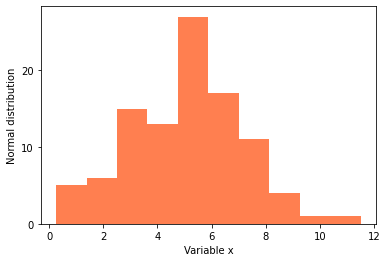

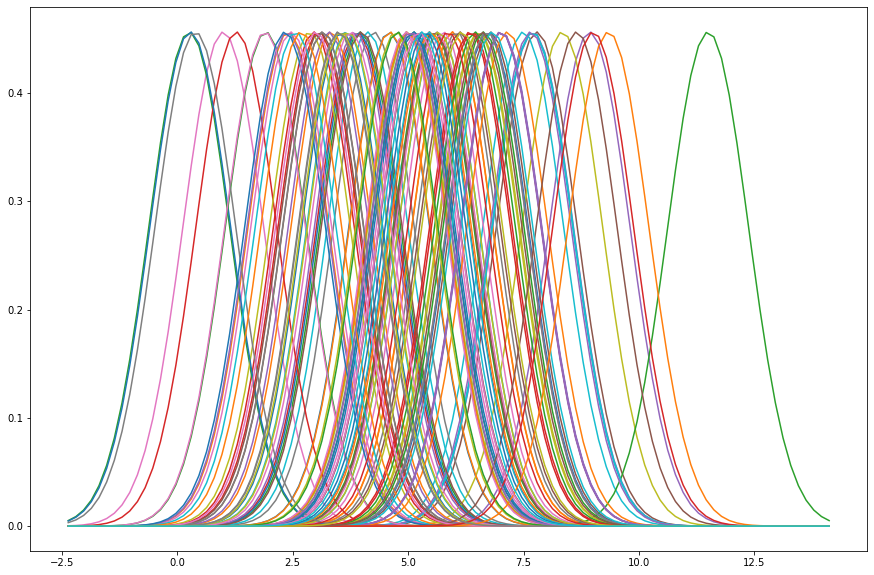

Integral x: 501.7749087284575
Integral g: 600.7004013620175


In [31]:
import numpy as np
from math import sqrt
from scipy.stats import norm
from scipy.integrate import trapz
import matplotlib.pyplot as pl
from matplotlib.ticker import MultipleLocator

N=100
b=int(sqrt(N))
mean=5.0
sigma=2.0
np.random.seed(12345)

mu=sqrt(mean)

#variable normally distributed with mean=5.0 and stdev=2.0
x=np.random.normal(mean, sigma, size=N)

fig, ax1=pl.subplots(1, 1)
ax1.hist(x, bins=b, color='coral')
ax1.yaxis.set_major_locator(MultipleLocator(10))
pl.xlabel("Variable x")
pl.ylabel("Normal distribution")
pl.plot()
pl.show()

stdev=1.06*x.std()*x.size**(-1/5.)
xax=np.linspace(x.min()-3*stdev, x.max()+3*stdev, N)
tot=np.zeros([N])

pl.figure(figsize=(15, 10))

for i in range(len(x)):
    g=norm.pdf(xax, loc=float(x[i]), scale=stdev)
    pl.plot(xax, g)
    tot=np.vstack([tot, g])

pl.show()

all_g=np.sum(tot, axis=0)

intg1=trapz(x)
intg2=trapz(all_g)
print("Integral x:", intg1)
print("Integral g:", intg2)

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

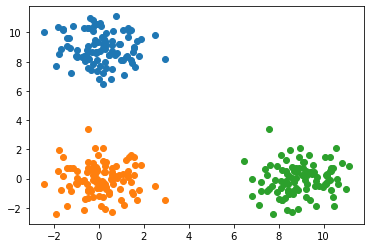

Dataset generated with 3 categories
[[ 1.57751832e+00 -4.95833370e-01  1.84344952e-01 -4.75035994e-01
   2.10703189e-01  6.46788691e-01  1.13015838e+00  9.81537999e-01
  -4.76566654e-01  2.49969969e+00 -9.78149551e-01  1.86046900e+00
  -6.35293014e-02  2.65502622e-01  3.15649966e-01  1.36319109e+00
  -6.73752396e-02  5.69055198e-01 -5.20891842e-01  1.27903221e+00
   7.95377344e-01 -1.12558498e+00 -1.30648612e+00  6.08418649e-01
   8.97290325e-02  5.58234287e-01  5.95735867e-01  1.69535679e+00
  -6.69436049e-01  7.17833621e-02 -1.61342089e+00  1.23271938e-01
   2.92522480e+00 -4.94602740e-01 -3.47073261e-01 -2.43859748e-01
   1.68324713e-01 -1.21996435e+00 -2.68922542e-01 -4.39884194e-01
  -1.33196780e-01 -1.02758103e+00 -3.11589761e-01  6.03987906e-01
   2.97813420e-01  1.59856010e+00 -2.24225452e-01 -1.35071829e-01
   1.29502331e+00  9.24057905e-01  4.74992123e-01  3.53354597e-02
  -2.71830528e-01 -1.56456406e-01 -1.69108229e+00  1.41625323e+00
   1.53288061e+00 -4.90568311e-01 -5.190

In [17]:
import pandas as pd
import numpy as np
import numpy.random as npr
from itertools import combinations
import matplotlib.pyplot as pl

def dat(n, sz): #input parameters: n number of categories, sz size of each category
    if n<2:
        return "Error: n must be >=2"
    else:
        mn=float(npr.randint(10)) #mean
        a=npr.normal(loc=mn, scale=1.0, size=sz) #1st category
              
        #other n-1 categories
        for i in range(n-1):
            mn=float(npr.randint(10)) #mean
            nor=npr.normal(loc=mn, scale=1.0, size=sz)
            a=np.vstack([a, nor])
        
        N=np.arange(n)
        c=list(combinations(N, 2))
        
        for i, j in c:
            pl.scatter(a[i], a[j])

        pl.show()
        print("Dataset generated with {} categories".format(n))
        
    return a
            
print(dat(3, 100))

In [ ]:
from IPython.display import Image
Image('https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

File dataframe 
        residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
2      -7.200000        3.4
3      -4.150000        8.4
4      -6.590000        1.7
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[11131 rows x 2 columns]

Abs(residuals)<2 
            0
0   1.100000
0  -1.950000
0  -0.042857
0   0.128571
0   0.085714
..       ...
0  -0.760000
0   0.380000
0   0.083333
0   0.166667
0   0.083333

[10489 rows x 1 columns]

Linear regression: LinregressResult(slope=0.07989758117486039, intercept=9.820720326596168, rvalue=0.056597511872424046, pvalue=2.2958576253921742e-09, stderr=0.013360155768341927)



C:\Users\Utente\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



Array x: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Array y: [ 0.60291111  1.49034139  2.50166381  3.49404135  4.46340509  5.50070866
  6.51575212  7.51023707  8.48363736  9.50676842 10.52602434 11.47986633
 12.48809963 13.50834719 14.50308503 15.48048218 16.50733546 17.49742708
 18.50893678 19.47494033]
Array erry: [0.22794388 0.26748743 0.26584177 0.26435839 0.2566054  0.25715928
 0.25262754 0.25462732 0.2588712  0.26233632 0.25265871 0.25739131
 0.27513966 0.25601866 0.25827402 0.26729815 0.25945734 0.26830951
 0.25804947 0.25946716]



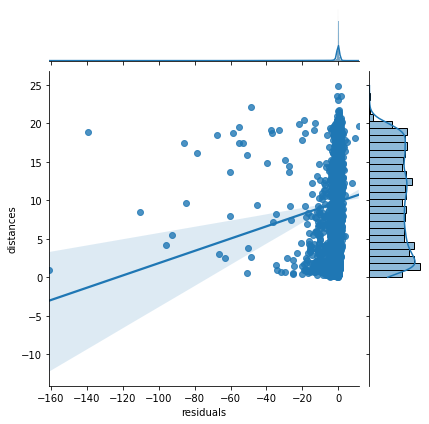

In [32]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import seaborn as sb
import matplotlib.pyplot as pl

resid=np.load('C:\\Users\\Utente\\Desktop\\Lab of Computational Physics\\residuals_261.npy', allow_pickle=True)
it=np.ndarray.item(resid)

res=pd.DataFrame(it)
print("File dataframe \n", res)

print("")

#the two variables are columns "residuals" and "distances"

res2=pd.DataFrame()

#selecting entries
for i in range(len(res)):
    if abs(res['residuals'][i])<2:
        res2=res2.append([res['residuals'][i]])

print("Abs(residuals)<2 \n", res2)

print("")

#linear regression with scipy
x=np.array(res['residuals'])
y=np.array(res['distances'])
s=sps.linregress(x, y)

print("Linear regression:", s)

print("")

#seaborn jointplot
regr=sb.jointplot("residuals", "distances", data=res, kind="reg")
print(regr)

print("")

#filling 3 numpy arrays
x=np.arange(21)
y=np.array([])
erry=np.array([])

for i in range(1, len(x)):
    somma=np.array([])
    for j in range(len(res)):
        if res['distances'][j]>x[i-1] and res['distances'][j]<x[i]:
            somma=np.append(somma, res['distances'][j])
    media=np.mean(somma)
    stdev=np.std(somma)
    y=np.append(y, media)
    erry=np.append(erry, stdev)

print("Array x:", x)
print("Array y:", y)
print("Array erry:", erry)

print("")

scat.scatter(res['residuals'], res['distances'])
pl.show()